# Ejercicio 2
Alejandro Reyes Romero

# Instrucciones:
Aproximar el decaimiento radioactivo usando los metodos forward Euler y backward Euler.

(a) Escribir y analizar las formulas de los metodos, 

(b) implementar los metodos en Python y 

(c) mostrar el comportamiento de ambos metodos para λ= 1.5,y $y_{0}$= 20,Tmax= 10 y Nt= 7,8,9,10,20, 

(d) ¿Cuantos puntos se necesitan para que el error sea menor que 1.0 en cada metodo?

(e) Ahora use λ= 2 y conteste lo siguiente:

1 ¿Para que valor de Nt el metodo FE converge?

2 ¿Para que valor de Nt el metodo FE deja de oscilar?

3 ¿Para que valor de Nt el metodo BE tiene un error menor a 3.0?

4 ¿Para que valor de Nt el metodo FE tiene un error menor a 3.0?

# Inciso (a)
## Forward Euler
$\textbf{Formula:}$

En este caso:
$y_{N+1}=(1-h_{t}\lambda)y_{N}$

$\textbf{Análisis:}$
La fórmula de Forward Euler, para este problema va tener un problema de oscilación debido a que la resta de $(1-h_{t}\lambda)$ por lo general tendrá valores negativos, esto causa un problema de estabilidad, al necesitar más iteraciones para converger.   

## Backwards Euler
$\textbf{Formula:}$ 

En este caso:
$y_{N+1}=(1+h_{t}\lambda)^{-1}y_{N}$

$\textbf{Análisis:}$
La fórmula de Backwards Euler, para este caso tiene la particularidad de que la suma de $(1+h_{t}\lambda)$ siempre serán números positivos mayores a cero, en este caso no hay un problema de estabilidad, por lo que converge más rápido que el método de Forward Euler.

# Inciso (b)
## Implementación en Python:

In [1]:
#Importamos los módulos necesarios:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Definimos las funciones que se utilizaran para calcular ambos métodos
def  mesh(a, b, Nt):
    """
    Regresa el espaciamiento de malla, con un punto de inicio (a) y un punto de final (b), con Nt número de espaciamiento
    """
    ht = (b-a) / Nt
    return  ht

def  exactSolution(t, y0, lam):
    """
    Regresa la solución exacta al problema con el dominio (t), la condición inicial y0, y el valor de lambda (lam)
    """
    return  y0 * np.exp(-lam * t)

def  forwardEuler(y, ht , lam):
    """
    Resuelve el problema por el método de Forward Euler con lo siguiente: 
    y => Vector de soluciones, 
    ht=>Tamaño de los espacios en la malla
    lam=>Valor de lambda
    Regresa la solución An
    """
    A = 1 - ht*lam
    An = [A]
    for i, val in  enumerate(y[0: -1]):
        y[i+1] = A * y[i]
        An.append(An[i] * A)
    return  An
def  backwardEuler(y, ht, lam):
    """
    Resuelve el problema por el método de Backwards Euler con lo siguiente: 
    y => Vector de soluciones, 
    ht=>Tamaño de los espacios en la malla
    lam=>Valor de lambda
    Regresa la solución Bn
    """
    B = 1 /(1 + ht*lam)
    Bn = [B]
    for i, val in  enumerate(y[0: -1]):
        y[i+1] = B * y[i]
        Bn.append(Bn[i] * B)
    return  Bn

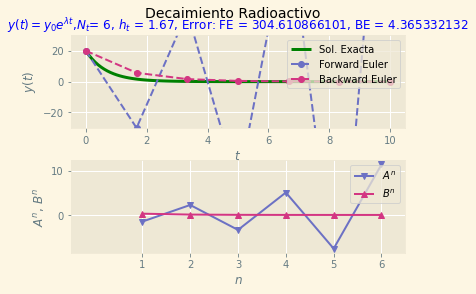

In [3]:
Nt = 6
Tmax   = 10
ht = mesh(0, Tmax , Nt)
y0 = 20
lam = 1.5
t   = np.linspace(0, Tmax , Nt+1)
yf = np.zeros(Nt+1)
yb = np.zeros(Nt+1)
yf[0] = y0
yb[0] = y0
An = forwardEuler(yf , ht , lam)
Bn = backwardEuler(yb, ht , lam)
tl = np.linspace(0, Tmax , 100)
y_exacta = exactSolution(tl, y0 , lam)
y_exac_p = exactSolution(t, y0, lam)
norma_error_f = np.linalg.norm(yf - y_exac_p ,2)
norma_error_b = np.linalg.norm(yb - y_exac_p ,2)

#Graficos
Ecuacion = '$y(t) = y_0 e^{\lambda t}$,' + '$N_t$' + '= {}'.format(Nt) + \
', $h_t$ ' + '= {:03.2f}'.format(ht)

Error = ', Error: FE = {:10.9f}, BE = {:10.9f}'.format(norma_error_f , norma_error_b)
plt.style.use(['Solarize_Light2'])
fig , (ax1 , ax2) = plt.subplots(2,1)
fig.suptitle('Decaimiento Radioactivo', fontsize =14)
ax1.plot(tl, y_exacta , 'g-', lw=3, label='Sol. Exacta')
ax1.plot(t, yf , 'C7o--', label='Forward Euler ')
ax1.plot(t, yb , 'C6o--', label='Backward Euler')
ax1.set_title(Ecuacion + Error , fontsize =12,  color='blue')
ax1.set_xlim (-0.5,t[ -1]+0.5)
ax1.set_ylim (-30,30)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc='upper right', ncol=1,  framealpha =0.75,  fancybox=True , fontsize =10)
ax1.grid(color='w')
nticks = np.arange(1,Nt+1,1)
ax2.plot(nticks , An[:-1],'C7v-', label='$A^n$')
ax2.plot(nticks , Bn[:-1],'C6^-', label='$B^n$')
ax2.set_xlim (-0.5,Nt+0.5)
ax2.set_xticks(nticks)
ax2.set_xlabel('$n$')
ax2.set_ylabel('$A^n$, $B^n$')
ax2.legend(loc='upper right', ncol=1,  framealpha =0.75,  fancybox=True , fontsize =10)
ax2.grid(color='w')
plt.subplots_adjust(hspace =0.35)
plt.savefig('decaimiento_Nt_{}.pdf'.format(Nt))
plt.show()

# Inciso (c)
## Con $\lambda =1.5, y_{0}=20, T_{max}=10, N_{t}=7$

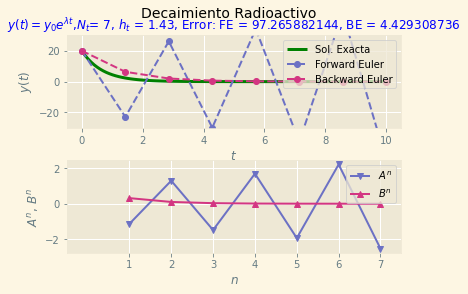

In [4]:
Nt = 7
Tmax   = 10
ht = mesh(0, Tmax , Nt)
y0 = 20
lam = 1.5
t   = np.linspace(0, Tmax , Nt+1)
yf = np.zeros(Nt+1)
yb = np.zeros(Nt+1)
yf[0] = y0
yb[0] = y0
An = forwardEuler(yf , ht , lam)
Bn = backwardEuler(yb, ht , lam)
tl = np.linspace(0, Tmax , 100)
y_exacta = exactSolution(tl, y0 , lam)
y_exac_p = exactSolution(t, y0, lam)
norma_error_f = np.linalg.norm(yf - y_exac_p ,2)
norma_error_b = np.linalg.norm(yb - y_exac_p ,2)

#Graficos
Ecuacion = '$y(t) = y_0 e^{\lambda t}$,' + '$N_t$' + '= {}'.format(Nt) + \
', $h_t$ ' + '= {:03.2f}'.format(ht)

Error = ', Error: FE = {:10.9f}, BE = {:10.9f}'.format(norma_error_f , norma_error_b)
plt.style.use(['Solarize_Light2'])
fig , (ax1 , ax2) = plt.subplots(2,1)
fig.suptitle('Decaimiento Radioactivo', fontsize =14)
ax1.plot(tl, y_exacta , 'g-', lw=3, label='Sol. Exacta')
ax1.plot(t, yf , 'C7o--', label='Forward Euler ')
ax1.plot(t, yb , 'C6o--', label='Backward Euler')
ax1.set_title(Ecuacion + Error , fontsize =12,  color='blue')
ax1.set_xlim (-0.5,t[ -1]+0.5)
ax1.set_ylim (-30,30)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc='upper right', ncol=1,  framealpha =0.75,  fancybox=True , fontsize =10)
ax1.grid(color='w')
nticks = np.arange(1,Nt+1,1)
ax2.plot(nticks , An[:-1],'C7v-', label='$A^n$')
ax2.plot(nticks , Bn[:-1],'C6^-', label='$B^n$')
ax2.set_xlim (-0.5,Nt+0.5)
ax2.set_xticks(nticks)
ax2.set_xlabel('$n$')
ax2.set_ylabel('$A^n$, $B^n$')
ax2.legend(loc='upper right', ncol=1,  framealpha =0.75,  fancybox=True , fontsize =10)
ax2.grid(color='w')
plt.subplots_adjust(hspace =0.35)
plt.savefig('decaimiento_Nt_{}.pdf'.format(Nt))
plt.show()

## Con $\lambda =1.5, y_{0}=20, T_{max}=10, N_{t}=8$

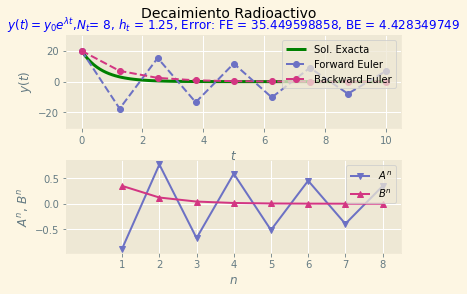

In [5]:
Nt = 8
Tmax   = 10
ht = mesh(0, Tmax , Nt)
y0 = 20
lam = 1.5
t   = np.linspace(0, Tmax , Nt+1)
yf = np.zeros(Nt+1)
yb = np.zeros(Nt+1)
yf[0] = y0
yb[0] = y0
An = forwardEuler(yf , ht , lam)
Bn = backwardEuler(yb, ht , lam)
tl = np.linspace(0, Tmax , 100)
y_exacta = exactSolution(tl, y0 , lam)
y_exac_p = exactSolution(t, y0, lam)
norma_error_f = np.linalg.norm(yf - y_exac_p ,2)
norma_error_b = np.linalg.norm(yb - y_exac_p ,2)

#Graficos
Ecuacion = '$y(t) = y_0 e^{\lambda t}$,' + '$N_t$' + '= {}'.format(Nt) + \
', $h_t$ ' + '= {:03.2f}'.format(ht)

Error = ', Error: FE = {:10.9f}, BE = {:10.9f}'.format(norma_error_f , norma_error_b)
plt.style.use(['Solarize_Light2'])
fig , (ax1 , ax2) = plt.subplots(2,1)
fig.suptitle('Decaimiento Radioactivo', fontsize =14)
ax1.plot(tl, y_exacta , 'g-', lw=3, label='Sol. Exacta')
ax1.plot(t, yf , 'C7o--', label='Forward Euler ')
ax1.plot(t, yb , 'C6o--', label='Backward Euler')
ax1.set_title(Ecuacion + Error , fontsize =12,  color='blue')
ax1.set_xlim (-0.5,t[ -1]+0.5)
ax1.set_ylim (-30,30)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc='upper right', ncol=1,  framealpha =0.75,  fancybox=True , fontsize =10)
ax1.grid(color='w')
nticks = np.arange(1,Nt+1,1)
ax2.plot(nticks , An[:-1],'C7v-', label='$A^n$')
ax2.plot(nticks , Bn[:-1],'C6^-', label='$B^n$')
ax2.set_xlim (-0.5,Nt+0.5)
ax2.set_xticks(nticks)
ax2.set_xlabel('$n$')
ax2.set_ylabel('$A^n$, $B^n$')
ax2.legend(loc='upper right', ncol=1,  framealpha =0.75,  fancybox=True , fontsize =10)
ax2.grid(color='w')
plt.subplots_adjust(hspace =0.35)
plt.savefig('decaimiento_Nt_{}.pdf'.format(Nt))
plt.show()

## Con $\lambda =1.5, y_{0}=20, T_{max}=10, N_{t}=9$

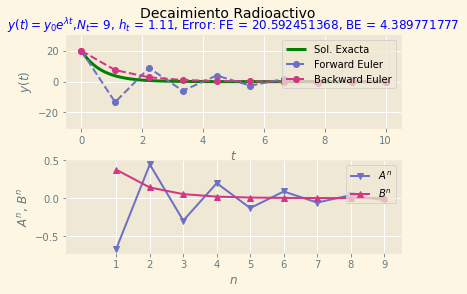

In [6]:
Nt = 9
Tmax   = 10
ht = mesh(0, Tmax , Nt)
y0 = 20
lam = 1.5
t   = np.linspace(0, Tmax , Nt+1)
yf = np.zeros(Nt+1)
yb = np.zeros(Nt+1)
yf[0] = y0
yb[0] = y0
An = forwardEuler(yf , ht , lam)
Bn = backwardEuler(yb, ht , lam)
tl = np.linspace(0, Tmax , 100)
y_exacta = exactSolution(tl, y0 , lam)
y_exac_p = exactSolution(t, y0, lam)
norma_error_f = np.linalg.norm(yf - y_exac_p ,2)
norma_error_b = np.linalg.norm(yb - y_exac_p ,2)

#Graficos
Ecuacion = '$y(t) = y_0 e^{\lambda t}$,' + '$N_t$' + '= {}'.format(Nt) + \
', $h_t$ ' + '= {:03.2f}'.format(ht)

Error = ', Error: FE = {:10.9f}, BE = {:10.9f}'.format(norma_error_f , norma_error_b)
plt.style.use(['Solarize_Light2'])
fig , (ax1 , ax2) = plt.subplots(2,1)
fig.suptitle('Decaimiento Radioactivo', fontsize =14)
ax1.plot(tl, y_exacta , 'g-', lw=3, label='Sol. Exacta')
ax1.plot(t, yf , 'C7o--', label='Forward Euler ')
ax1.plot(t, yb , 'C6o--', label='Backward Euler')
ax1.set_title(Ecuacion + Error , fontsize =12,  color='blue')
ax1.set_xlim (-0.5,t[ -1]+0.5)
ax1.set_ylim (-30,30)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc='upper right', ncol=1,  framealpha =0.75,  fancybox=True , fontsize =10)
ax1.grid(color='w')
nticks = np.arange(1,Nt+1,1)
ax2.plot(nticks , An[:-1],'C7v-', label='$A^n$')
ax2.plot(nticks , Bn[:-1],'C6^-', label='$B^n$')
ax2.set_xlim (-0.5,Nt+0.5)
ax2.set_xticks(nticks)
ax2.set_xlabel('$n$')
ax2.set_ylabel('$A^n$, $B^n$')
ax2.legend(loc='upper right', ncol=1,  framealpha =0.75,  fancybox=True , fontsize =10)
ax2.grid(color='w')
plt.subplots_adjust(hspace =0.35)
plt.savefig('decaimiento_Nt_{}.pdf'.format(Nt))
plt.show()

## Con $\lambda =1.5, y_{0}=20, T_{max}=10, N_{t}=10$

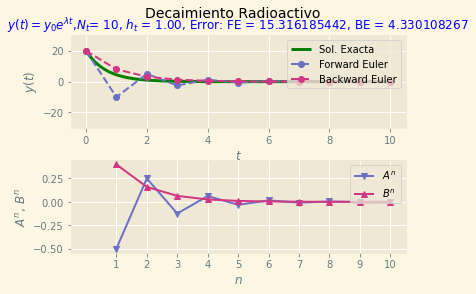

In [7]:
Nt = 10
Tmax   = 10
ht = mesh(0, Tmax , Nt)
y0 = 20
lam = 1.5
t   = np.linspace(0, Tmax , Nt+1)
yf = np.zeros(Nt+1)
yb = np.zeros(Nt+1)
yf[0] = y0
yb[0] = y0
An = forwardEuler(yf , ht , lam)
Bn = backwardEuler(yb, ht , lam)
tl = np.linspace(0, Tmax , 100)
y_exacta = exactSolution(tl, y0 , lam)
y_exac_p = exactSolution(t, y0, lam)
norma_error_f = np.linalg.norm(yf - y_exac_p ,2)
norma_error_b = np.linalg.norm(yb - y_exac_p ,2)

#Graficos
Ecuacion = '$y(t) = y_0 e^{\lambda t}$,' + '$N_t$' + '= {}'.format(Nt) + \
', $h_t$ ' + '= {:03.2f}'.format(ht)

Error = ', Error: FE = {:10.9f}, BE = {:10.9f}'.format(norma_error_f , norma_error_b)
plt.style.use(['Solarize_Light2'])
fig , (ax1 , ax2) = plt.subplots(2,1)
fig.suptitle('Decaimiento Radioactivo', fontsize =14)
ax1.plot(tl, y_exacta , 'g-', lw=3, label='Sol. Exacta')
ax1.plot(t, yf , 'C7o--', label='Forward Euler ')
ax1.plot(t, yb , 'C6o--', label='Backward Euler')
ax1.set_title(Ecuacion + Error , fontsize =12,  color='blue')
ax1.set_xlim (-0.5,t[ -1]+0.5)
ax1.set_ylim (-30,30)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc='upper right', ncol=1,  framealpha =0.75,  fancybox=True , fontsize =10)
ax1.grid(color='w')
nticks = np.arange(1,Nt+1,1)
ax2.plot(nticks , An[:-1],'C7v-', label='$A^n$')
ax2.plot(nticks , Bn[:-1],'C6^-', label='$B^n$')
ax2.set_xlim (-0.5,Nt+0.5)
ax2.set_xticks(nticks)
ax2.set_xlabel('$n$')
ax2.set_ylabel('$A^n$, $B^n$')
ax2.legend(loc='upper right', ncol=1,  framealpha =0.75,  fancybox=True , fontsize =10)
ax2.grid(color='w')
plt.subplots_adjust(hspace =0.35)
plt.savefig('decaimiento_Nt_{}.pdf'.format(Nt))
plt.show()

## Con $\lambda =1.5, y_{0}=20, T_{max}=10, N_{t}=20$

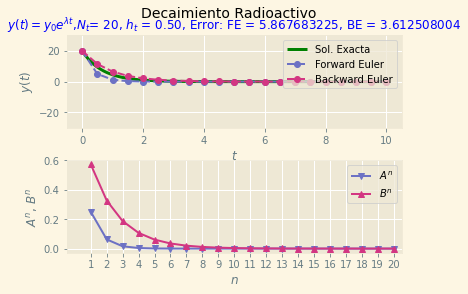

In [8]:
Nt = 20
Tmax   = 10
ht = mesh(0, Tmax , Nt)
y0 = 20
lam = 1.5
t   = np.linspace(0, Tmax , Nt+1)
yf = np.zeros(Nt+1)
yb = np.zeros(Nt+1)
yf[0] = y0
yb[0] = y0
An = forwardEuler(yf , ht , lam)
Bn = backwardEuler(yb, ht , lam)
tl = np.linspace(0, Tmax , 100)
y_exacta = exactSolution(tl, y0 , lam)
y_exac_p = exactSolution(t, y0, lam)
norma_error_f = np.linalg.norm(yf - y_exac_p ,2)
norma_error_b = np.linalg.norm(yb - y_exac_p ,2)

#Graficos
Ecuacion = '$y(t) = y_0 e^{\lambda t}$,' + '$N_t$' + '= {}'.format(Nt) + \
', $h_t$ ' + '= {:03.2f}'.format(ht)

Error = ', Error: FE = {:10.9f}, BE = {:10.9f}'.format(norma_error_f , norma_error_b)
plt.style.use(['Solarize_Light2'])
fig , (ax1 , ax2) = plt.subplots(2,1)
fig.suptitle('Decaimiento Radioactivo', fontsize =14)
ax1.plot(tl, y_exacta , 'g-', lw=3, label='Sol. Exacta')
ax1.plot(t, yf , 'C7o--', label='Forward Euler ')
ax1.plot(t, yb , 'C6o--', label='Backward Euler')
ax1.set_title(Ecuacion + Error , fontsize =12,  color='blue')
ax1.set_xlim (-0.5,t[ -1]+0.5)
ax1.set_ylim (-30,30)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc='upper right', ncol=1,  framealpha =0.75,  fancybox=True , fontsize =10)
ax1.grid(color='w')
nticks = np.arange(1,Nt+1,1)
ax2.plot(nticks , An[:-1],'C7v-', label='$A^n$')
ax2.plot(nticks , Bn[:-1],'C6^-', label='$B^n$')
ax2.set_xlim (-0.5,Nt+0.5)
ax2.set_xticks(nticks)
ax2.set_xlabel('$n$')
ax2.set_ylabel('$A^n$, $B^n$')
ax2.legend(loc='upper right', ncol=1,  framealpha =0.75,  fancybox=True , fontsize =10)
ax2.grid(color='w')
plt.subplots_adjust(hspace =0.35)
plt.savefig('decaimiento_Nt_{}.pdf'.format(Nt))
plt.show()

# Inciso (d)

384


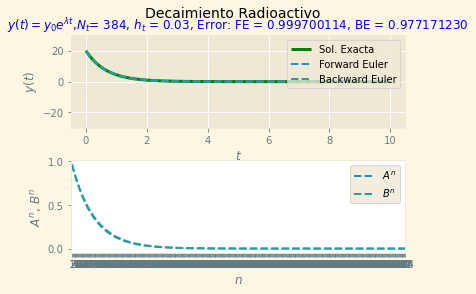

In [9]:
#Forward Euler
for Nt in range(1,1001):
    Tmax   = 10
    ht = mesh(0, Tmax ,Nt)
    y0 = 20
    lam = 1.5
    t   = np.linspace(0, Tmax , Nt+1)
    yf = np.zeros(Nt+1)
    yb = np.zeros(Nt+1)
    yf[0] = y0
    yb[0] = y0
    An = forwardEuler(yf , ht , lam)
    Bn = backwardEuler(yb, ht , lam)
    tl = np.linspace(0, Tmax , 100)
    y_exacta = exactSolution(tl, y0 , lam)
    y_exac_p = exactSolution(t, y0, lam)
    norma_error_f = np.linalg.norm(yf - y_exac_p ,2)
    norma_error_b = np.linalg.norm(yb - y_exac_p ,2)
    if norma_error_f < 1:
        print(Nt)
        break
        
#Graficos
Ecuacion = '$y(t) = y_0 e^{\lambda t}$,' + '$N_t$' + '= {}'.format(Nt) + \
', $h_t$ ' + '= {:03.2f}'.format(ht)

Error = ', Error: FE = {:10.9f}, BE = {:10.9f}'.format(norma_error_f , norma_error_b)
plt.style.use(['Solarize_Light2'])
fig , (ax1 , ax2) = plt.subplots(2,1)
fig.suptitle('Decaimiento Radioactivo', fontsize =14)
ax1.plot(tl, y_exacta , 'g-', lw=3, label='Sol. Exacta')
ax1.plot(t, yf , '--', label='Forward Euler ')
ax1.plot(t, yb , '--', label='Backward Euler')
ax1.set_title(Ecuacion + Error , fontsize =12,  color='blue')
ax1.set_xlim (-0.5,t[ -1]+0.5)
ax1.set_ylim (-30,30)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc='upper right', ncol=1,  framealpha =0.75,  fancybox=True , fontsize =10)
ax1.grid(color='w')
nticks = np.arange(1,Nt+1,1)
ax2.plot(nticks , An[:-1],'--', label='$A^n$')
ax2.plot(nticks , Bn[:-1],'--', label='$B^n$')
ax2.set_xlim (-0.5,Nt+0.5)
ax2.set_xticks(nticks)
ax2.set_xlabel('$n$')
ax2.set_ylabel('$A^n$, $B^n$')
ax2.legend(loc='upper right', ncol=1,  framealpha =0.75,  fancybox=True , fontsize =10)
ax2.grid(color='w')
plt.subplots_adjust(hspace =0.35)
plt.savefig('decaimiento_Nt_{}.pdf'.format(Nt))
plt.show()        
        



367


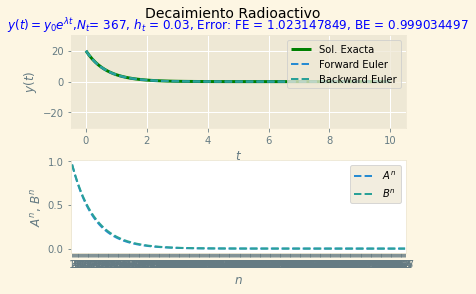

In [10]:
#Backward Euler
for Nt in range (1,1001):
    Tmax   = 10
    ht = mesh(0, Tmax ,Nt)
    y0 = 20
    lam = 1.5
    t   = np.linspace(0, Tmax , Nt+1)
    yf = np.zeros(Nt+1)
    yb = np.zeros(Nt+1)
    yf[0] = y0
    yb[0] = y0
    An = forwardEuler(yf , ht , lam)
    Bn = backwardEuler(yb, ht , lam)
    tl = np.linspace(0, Tmax , 100)
    y_exacta = exactSolution(tl, y0 , lam)
    y_exac_p = exactSolution(t, y0, lam)
    norma_error_f = np.linalg.norm(yf - y_exac_p ,2)
    norma_error_b = np.linalg.norm(yb - y_exac_p ,2)
    if norma_error_b < 1:
        print(Nt)
        break
#Graficos
Ecuacion = '$y(t) = y_0 e^{\lambda t}$,' + '$N_t$' + '= {}'.format(Nt) + \
', $h_t$ ' + '= {:03.2f}'.format(ht)

Error = ', Error: FE = {:10.9f}, BE = {:10.9f}'.format(norma_error_f , norma_error_b)
plt.style.use(['Solarize_Light2'])
fig , (ax1 , ax2) = plt.subplots(2,1)
fig.suptitle('Decaimiento Radioactivo', fontsize =14)
ax1.plot(tl, y_exacta , 'g-', lw=3, label='Sol. Exacta')
ax1.plot(t, yf , '--', label='Forward Euler ')
ax1.plot(t, yb , '--', label='Backward Euler')
ax1.set_title(Ecuacion + Error , fontsize =12,  color='blue')
ax1.set_xlim (-0.5,t[ -1]+0.5)
ax1.set_ylim (-30,30)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc='upper right', ncol=1,  framealpha =0.75,  fancybox=True , fontsize =10)
ax1.grid(color='w')
nticks = np.arange(1,Nt+1,1)
ax2.plot(nticks , An[:-1],'--', label='$A^n$')
ax2.plot(nticks , Bn[:-1],'--', label='$B^n$')
ax2.set_xlim (-0.5,Nt+0.5)
ax2.set_xticks(nticks)
ax2.set_xlabel('$n$')
ax2.set_ylabel('$A^n$, $B^n$')
ax2.legend(loc='upper right', ncol=1,  framealpha =0.75,  fancybox=True , fontsize =10)
ax2.grid(color='w')
plt.subplots_adjust(hspace =0.35)
plt.savefig('decaimiento_Nt_{}.pdf'.format(Nt))
plt.show()

## Respuestas
1. Para Forward Euler el error se vuelve menor a 1 en Nt=384
2. Para Backwards Euler el error se vuelve menor a 1 en Nt=367

# Inciso (e)
## Con $\lambda =2$


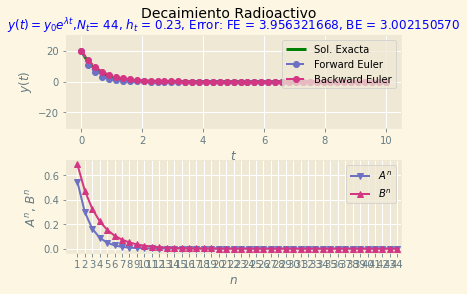

In [11]:
Nt = 44
Tmax   = 10
ht = mesh(0, Tmax , Nt)
y0 = 20
lam = 2
t   = np.linspace(0, Tmax , Nt+1)
yf = np.zeros(Nt+1)
yb = np.zeros(Nt+1)
yf[0] = y0
yb[0] = y0
An = forwardEuler(yf , ht , lam)
Bn = backwardEuler(yb, ht , lam)
tl = np.linspace(0, Tmax , 100)
y_exacta = exactSolution(tl, y0 , lam)
y_exac_p = exactSolution(t, y0, lam)
norma_error_f = np.linalg.norm(yf - y_exac_p ,2)
norma_error_b = np.linalg.norm(yb - y_exac_p ,2)

#Graficos
Ecuacion = '$y(t) = y_0 e^{\lambda t}$,' + '$N_t$' + '= {}'.format(Nt) + \
', $h_t$ ' + '= {:03.2f}'.format(ht)

Error = ', Error: FE = {:10.9f}, BE = {:10.9f}'.format(norma_error_f , norma_error_b)
plt.style.use(['Solarize_Light2'])
fig , (ax1 , ax2) = plt.subplots(2,1)
fig.suptitle('Decaimiento Radioactivo', fontsize =14)
ax1.plot(tl, y_exacta , 'g-', lw=3, label='Sol. Exacta')
ax1.plot(t, yf , 'C7o--', label='Forward Euler ')
ax1.plot(t, yb , 'C6o--', label='Backward Euler')
ax1.set_title(Ecuacion + Error , fontsize =12,  color='blue')
ax1.set_xlim (-0.5,t[ -1]+0.5)
ax1.set_ylim (-30,30)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc='upper right', ncol=1,  framealpha =0.75,  fancybox=True , fontsize =10)
ax1.grid(color='w')
nticks = np.arange(1,Nt+1,1)
ax2.plot(nticks , An[:-1],'C7v-', label='$A^n$')
ax2.plot(nticks , Bn[:-1],'C6^-', label='$B^n$')
ax2.set_xlim (-0.5,Nt+0.5)
ax2.set_xticks(nticks)
ax2.set_xlabel('$n$')
ax2.set_ylabel('$A^n$, $B^n$')
ax2.legend(loc='upper right', ncol=1,  framealpha =0.75,  fancybox=True , fontsize =10)
ax2.grid(color='w')
plt.subplots_adjust(hspace =0.35)
plt.savefig('decaimiento_lam_{}_Nt_ {}.pdf'.format(lam, Nt))
plt.show()

45


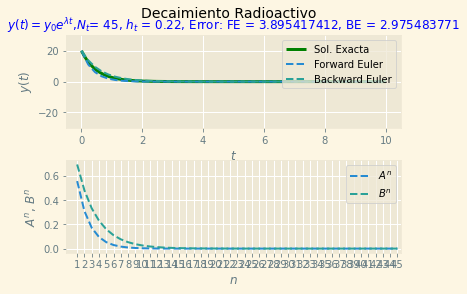

In [12]:
#Backward Euler
for Nt in range (1,1001):
    Tmax   = 10
    ht = mesh(0, Tmax ,Nt)
    y0 = 20
    lam = 2
    t   = np.linspace(0, Tmax , Nt+1)
    yf = np.zeros(Nt+1)
    yb = np.zeros(Nt+1)
    yf[0] = y0
    yb[0] = y0
    An = forwardEuler(yf , ht , lam)
    Bn = backwardEuler(yb, ht , lam)
    tl = np.linspace(0, Tmax , 100)
    y_exacta = exactSolution(tl, y0 , lam)
    y_exac_p = exactSolution(t, y0, lam)
    norma_error_f = np.linalg.norm(yf - y_exac_p ,2)
    norma_error_b = np.linalg.norm(yb - y_exac_p ,2)
    if norma_error_b < 3:
        if Nt<4:
            continue
        print(Nt)
        break
#Graficos
Ecuacion = '$y(t) = y_0 e^{\lambda t}$,' + '$N_t$' + '= {}'.format(Nt) + \
', $h_t$ ' + '= {:03.2f}'.format(ht)

Error = ', Error: FE = {:10.9f}, BE = {:10.9f}'.format(norma_error_f , norma_error_b)
plt.style.use(['Solarize_Light2'])
fig , (ax1 , ax2) = plt.subplots(2,1)
fig.suptitle('Decaimiento Radioactivo', fontsize =14)
ax1.plot(tl, y_exacta , 'g-', lw=3, label='Sol. Exacta')
ax1.plot(t, yf , '--', label='Forward Euler ')
ax1.plot(t, yb , '--', label='Backward Euler')
ax1.set_title(Ecuacion + Error , fontsize =12,  color='blue')
ax1.set_xlim (-0.5,t[ -1]+0.5)
ax1.set_ylim (-30,30)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc='upper right', ncol=1,  framealpha =0.75,  fancybox=True , fontsize =10)
ax1.grid(color='w')
nticks = np.arange(1,Nt+1,1)
ax2.plot(nticks , An[:-1],'--', label='$A^n$')
ax2.plot(nticks , Bn[:-1],'--', label='$B^n$')
ax2.set_xlim (-0.5,Nt+0.5)
ax2.set_xticks(nticks)
ax2.set_xlabel('$n$')
ax2.set_ylabel('$A^n$, $B^n$')
ax2.legend(loc='upper right', ncol=1,  framealpha =0.75,  fancybox=True , fontsize =10)
ax2.grid(color='w')
plt.subplots_adjust(hspace =0.35)
plt.savefig('decaimiento_lam_{}_Nt_ {}.pdf'.format(lam, Nt))
plt.show()

68


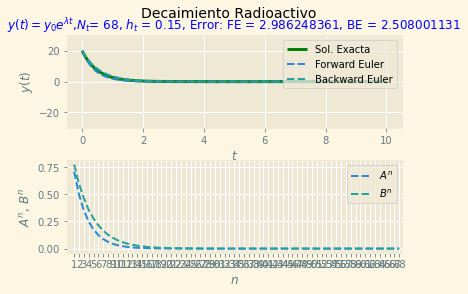

In [13]:
#Forward Euler
for Nt in range (1,1001):
    Tmax   = 10
    ht = mesh(0, Tmax ,Nt)
    y0 = 20
    lam = 2
    t   = np.linspace(0, Tmax , Nt+1)
    yf = np.zeros(Nt+1)
    yb = np.zeros(Nt+1)
    yf[0] = y0
    yb[0] = y0
    An = forwardEuler(yf , ht , lam)
    Bn = backwardEuler(yb, ht , lam)
    tl = np.linspace(0, Tmax , 100)
    y_exacta = exactSolution(tl, y0 , lam)
    y_exac_p = exactSolution(t, y0, lam)
    norma_error_f = np.linalg.norm(yf - y_exac_p ,2)
    norma_error_b = np.linalg.norm(yb - y_exac_p ,2)
    if norma_error_f < 3:
        print(Nt)
        break
#Graficos
Ecuacion = '$y(t) = y_0 e^{\lambda t}$,' + '$N_t$' + '= {}'.format(Nt) + \
', $h_t$ ' + '= {:03.2f}'.format(ht)

Error = ', Error: FE = {:10.9f}, BE = {:10.9f}'.format(norma_error_f , norma_error_b)
plt.style.use(['Solarize_Light2'])
fig , (ax1 , ax2) = plt.subplots(2,1)
fig.suptitle('Decaimiento Radioactivo', fontsize =14)
ax1.plot(tl, y_exacta , 'g-', lw=3, label='Sol. Exacta')
ax1.plot(t, yf , '--', label='Forward Euler ')
ax1.plot(t, yb , '--', label='Backward Euler')
ax1.set_title(Ecuacion + Error , fontsize =12,  color='blue')
ax1.set_xlim (-0.5,t[ -1]+0.5)
ax1.set_ylim (-30,30)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc='upper right', ncol=1,  framealpha =0.75,  fancybox=True , fontsize =10)
ax1.grid(color='w')
nticks = np.arange(1,Nt+1,1)
ax2.plot(nticks , An[:-1],'--', label='$A^n$')
ax2.plot(nticks , Bn[:-1],'--', label='$B^n$')
ax2.set_xlim (-0.5,Nt+0.5)
ax2.set_xticks(nticks)
ax2.set_xlabel('$n$')
ax2.set_ylabel('$A^n$, $B^n$')
ax2.legend(loc='upper right', ncol=1,  framealpha =0.75,  fancybox=True , fontsize =10)
ax2.grid(color='w')
plt.subplots_adjust(hspace =0.35)
plt.savefig('decaimiento_lam_{}_Nt_ {}.pdf'.format(lam, Nt))
plt.show()

# Respuestas:
1. El método de FE empieza a converger en Nt = 30
2. El método de FE deja de oscilar para Nt = 20
3. Para Backwards Euler el error se vuelve menor a 3 en Nt=45, aunque sucede que tambien puede haber un error menor a 3 en Nt=1, Nt=2 Y Nt=3 
4. Para Forward Euler el error se vuelve menor a 3 en Nt=68